In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', 'raise')
pl23 = pd.read_csv('Final.csv')
pl23 = pl23.set_index('Team')
print(pl23)

                   Rank  Unnamed: 2  MP  Won  Drawn  Lost  GF  GA  GD  Points
Team                                                                         
Man City              1         NaN  38   28      5     5  94  33  61      89
Arsenal               2         NaN  38   26      6     6  88  43  45      84
Man Utd               3         NaN  38   23      6     9  58  43  15      75
Newcastle             4         NaN  38   19     14     5  68  33  35      71
Liverpool             5         NaN  38   19     10     9  75  47  28      67
Brighton              6         NaN  38   18      8    12  72  53  19      62
Aston Villa           7         NaN  38   18      7    13  51  46   5      61
Spurs                 8         NaN  38   18      6    14  70  63   7      60
Brentford             9         NaN  38   15     14     9  58  46  12      59
Fulham               10         NaN  38   15      7    16  55  53   2      52
Crystal Palace       11         NaN  38   11     12    15  40  4

In [2]:
def generate_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    return centroids, centroids.values.tolist()

In [3]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i}'
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2 + (df.iloc[:,2] - centroid[2])**2)
        names.append(name)
    return df, names

In [4]:
def kmeans(df, xaxis, yaxis, zaxis, k, loops):
    df = df[[xaxis, yaxis, zaxis]].copy()
    df['cluster'] = 0
    centroids, coordinates = generate_centroids(df, k)
    stopIteration = True
    for i in range(loops):
        last_coordinates = coordinates
        df, names = calculate_distance(df, coordinates)
        df['cluster'] = df[names].idxmin(axis=1).str.split('_').str[-1]
        centroids = np.around(df.groupby('cluster')[[xaxis, yaxis, zaxis]].mean(), 4)
        coordinates = centroids.values.tolist()
        if coordinates == last_coordinates and stopIteration:
            break
    print(f'Total Iterations: {i + 1}')
        
    sns.scatterplot(data=centroids, x=xaxis, y=yaxis, color='black', s=150)
    sns.scatterplot(data=df, x=xaxis, y=yaxis, hue='cluster', palette='tab10')
    plt.show()
    return df, centroids

Total Iterations: 7


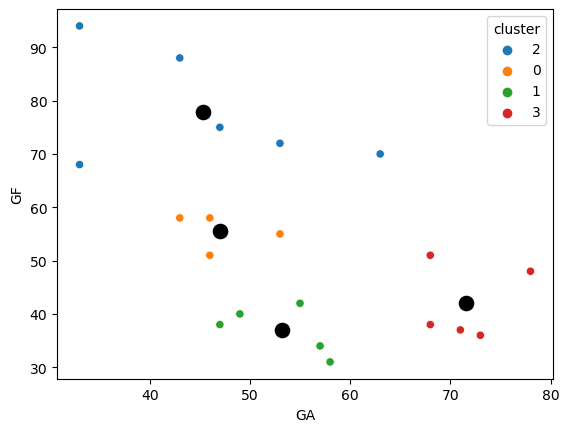

In [5]:
resultdf, centroids = kmeans(pl23, 'GA', 'GF', 'Won', 4, 1000)


In [6]:
resultdf

,GA,GF,Won,cluster,dist_centroid_0,dist_centroid_1,dist_centroid_2,dist_centroid_3
Team,,,,,,,,
Man City,33,94,28,2,42.229285,62.982537,21.399004,67.661806
Arsenal,43,88,26,2,33.768513,54.299171,11.427343,56.953665
Man Utd,43,58,23,0,7.057797,26.529229,20.039510,35.876455
Newcastle,33,68,19,2,18.809904,37.986840,15.945168,47.731750
Liverpool,47,75,19,2,19.540023,39.451236,4.031100,42.503176
Brighton,53,72,18,2,17.558830,35.816197,10.193948,36.580323
Aston Villa,46,51,18,0,4.616546,17.481419,27.047761,28.784023
Spurs,63,70,18,2,21.594270,35.253369,19.610807,30.824017
Brentford,46,58,15,0,3.848701,22.671568,20.830626,30.901780


In [7]:
sns.set_style("darkgrid")
mean_plot = 3
num = 40

In [8]:
x1 = resultdf['GA']#np.random.normal (mean_plot, 1, size = num)
y1 = resultdf['GF']#np.random.normal (mean_plot, 1, size = num)
z1 = resultdf['Won']#np.random.normal (mean_plot, 1, size = num)
clr = resultdf['cluster'].astype(int)
print(type(clr))

<class 'pandas.core.series.Series'>


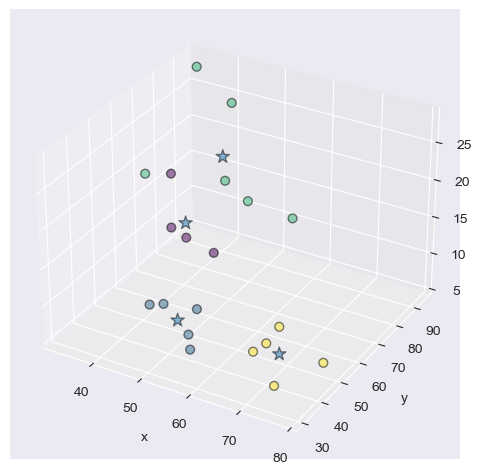

In [9]:
# plt.figure(figsize = (10, 10))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(x1, y1, z1, c=clr, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)
plot_axes.set_xlabel('x')
plot_axes.set_ylabel('y')
plot_axes.set_zlabel('z')
plot_axes.scatter3D(centroids['GA'], centroids['GF'], centroids['Won'],
            edgecolor='k', s=100, alpha = 0.5, marker='*')
plt.tight_layout()
plt.show()